## GQA Question Engine

In [1]:
!pip install networkx matplotlib

{'2716708': {'name': 'nose', 'h': 9, 'relations': [{'object': '2449847', 'name': 'of'}, {'object': '2493560', 'name': 'to the right of'}, {'object': '2370325', 'name': 'to the left of'}], 'w': 7, 'attributes': [], 'y': 54, 'x': 370}, '2370325': {'name': 'eyes', 'h': 4, 'relations': [{'object': '2493560', 'name': 'to the right of'}, {'object': '2716708', 'name': 'to the right of'}, {'object': '2449847', 'name': 'of'}], 'w': 6, 'attributes': [], 'y': 53, 'x': 379}, '2747168': {'name': 'sign', 'h': 52, 'relations': [{'object': '2449847', 'name': 'to the right of'}], 'w': 96, 'attributes': ['blue'], 'y': 124, 'x': 371}, '3576182': {'name': 'air', 'h': 194, 'relations': [], 'w': 492, 'attributes': [], 'y': 1, 'x': 2}, '3100523': {'name': 'ear', 'h': 12, 'relations': [{'object': '2449847', 'name': 'of'}, {'object': '2493560', 'name': 'to the right of'}], 'w': 11, 'attributes': [], 'y': 63, 'x': 389}, '2795769': {'name': 'socks', 'h': 19, 'relations': [{'object': '3576178', 'name': 'to the le

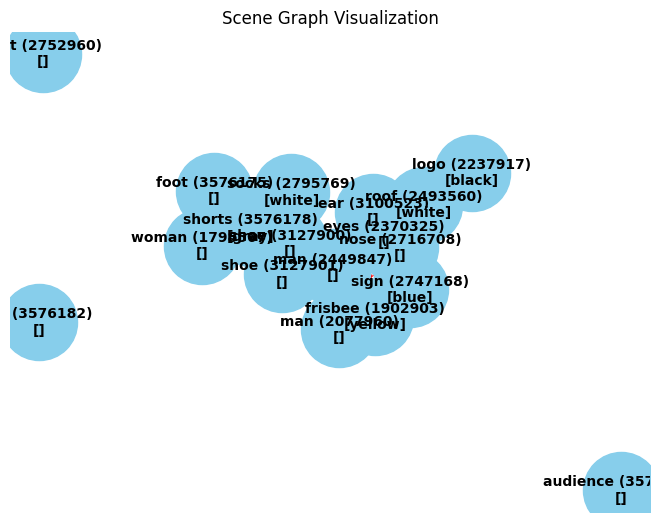

In [9]:
import json
import networkx as nx
import matplotlib.pyplot as plt

# Function to load JSON scene graph data from a file
def load_scene_graph(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

# Path to your scene graph JSON file
scene_graph_file = 'sceneGraphs/val_sceneGraphs.json'

# Load the scene graph data
scene_graph_data = load_scene_graph(scene_graph_file)

# Example image ID (replace with actual image IDs from your JSON data)
image_id = "2353884"

# Get scene graph for a specific image ID
if image_id in scene_graph_data:
    image_data = scene_graph_data[image_id]["objects"]
else:
    raise ValueError(f"Image ID {image_id} not found in the scene graph data")

print(image_data)

# Create a graph
G = nx.DiGraph()

for obj_id, obj_data in image_data.items():
    obj_name = f'{obj_data["name"]} ({obj_id})'
    attributes = ', '.join(obj_data["attributes"]) if "attributes" in obj_data else ""
    label = f'{obj_name}\n[{attributes}]'
    
    # Add object node with attributes
    G.add_node(obj_id, label=label)
    
    # Add edges for relationships
    if "relations" in obj_data:
        for relation in obj_data["relations"]:
            target_obj = relation["object"]
            relation_name = relation["name"]
            G.add_edge(obj_id, target_obj, label=relation_name)

# Define position layout (spring_layout for a simple graph visualization)
pos = nx.spring_layout(G)

# Draw nodes with labels
nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'), node_size=3000, node_color='skyblue', font_size=10, font_weight='bold')

# Draw edges with labels (relationship names)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Display the plot
plt.title("Scene Graph Visualization")
plt.show()